# PENGENALAN WAJAH MENGGUNAKAN METODE PRINCIPAL COMPONENT ANALYSIS (PCA) DAN MANHATTAN DISTANCE

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Pra-processing

### Membaca citra dataset ORL

In [3]:
datasetFaces = []
for i in range(1,41):
    for j in range(1,11):
        citra = cv2.imread('/Users/iamapinn/Developer/UTS Pengolahan CITRA/ORL/'+str(i)+'/ORL_'+str(i)+'_'+str(j)+'.jpg', cv2.COLOR_BGR2GRAY)
        datasetFaces.append(citra)
    
datasetFaces = np.array(datasetFaces)

print('Jumlah total dataset:', len(datasetFaces))
print('Ukuran dataset:', datasetFaces.shape)

Jumlah total dataset: 400
Ukuran dataset: (400, 112, 92)


### Visualisasi Dataset

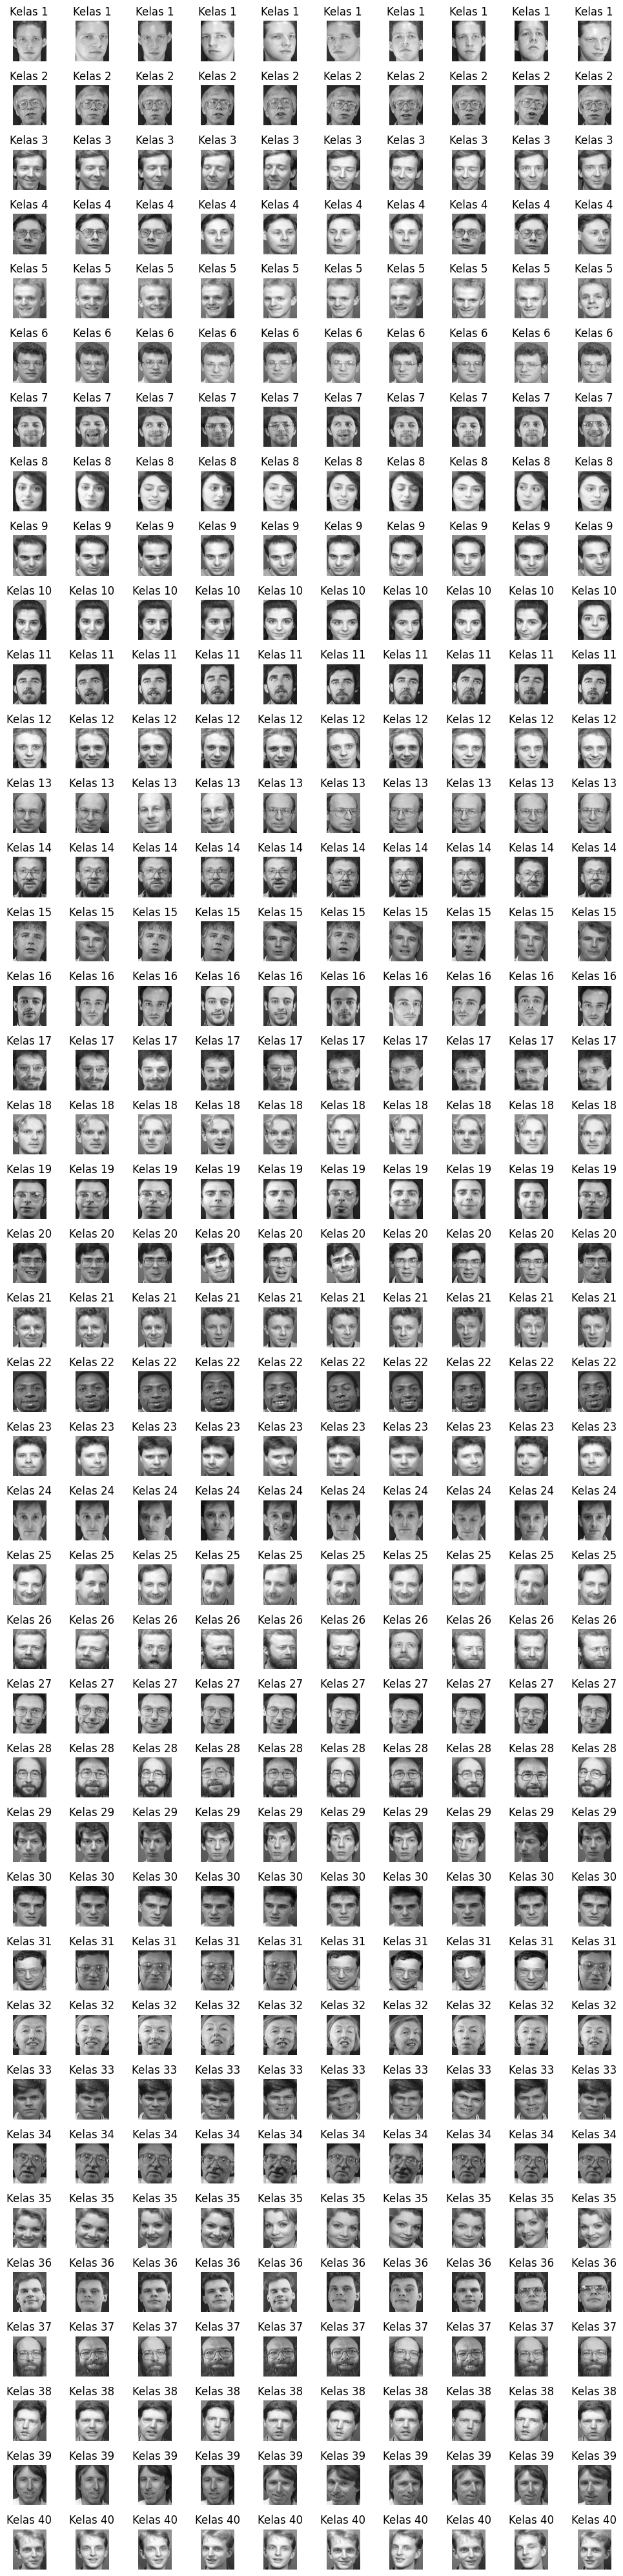

In [4]:
fig, ax = plt.subplots(40, 10, figsize=(10, 40))
for i in range(40):
    for j in range(10):
        ax[i, j].imshow(datasetFaces[i*10+j], cmap='gray')
        ax[i, j].set_title('Kelas '+str(i+1))
        ax[i, j].axis('off')
        
plt.tight_layout()
plt.show()

## Processing

### Ekstraksi Fitur menggunakan Principal Component Analysis (PCA) yaitu mereduksi jumlah dimensi yang tinggi ke dimensi yang lebih rendah

#### 1. Pembentukan matriks data citra wajah

<p>Langkah pertama yang dilakukan
adalah membentuk matriks data citra
dengan mengambil data pixel setiap
citranya.</p>

In [5]:
data = []
for i in range(40):
    for j in range(10):
        data.append(datasetFaces[i*10+j].flatten())
        
data = np.array(data)
print('Ukuran data:', data.shape)

df = pd.DataFrame(data[0:10])
df

Ukuran data: (400, 10304)


,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,48,53,43,43,59,51,39,48,54,48,...,39,40,42,44,46,47,46,46,46,46
1,60,63,62,54,49,53,59,62,70,72,...,33,30,31,31,31,31,33,33,33,34
2,40,30,53,48,55,50,64,40,40,31,...,30,31,33,31,30,32,29,29,28,28
3,67,53,39,36,37,35,33,32,35,44,...,174,172,166,159,161,168,140,37,11,27
4,63,75,75,56,42,49,64,73,62,50,...,30,30,31,32,33,33,37,38,38,39
5,39,63,24,64,81,78,69,46,57,35,...,168,166,164,161,157,154,155,159,146,174
6,37,46,49,43,44,52,56,52,62,48,...,24,35,36,36,33,35,38,38,38,37
7,49,39,31,29,31,31,33,36,44,61,...,43,43,40,36,33,32,42,41,39,37
8,41,40,41,42,43,43,40,38,31,38,...,40,37,36,39,41,39,45,44,43,43
9,34,29,30,36,39,38,41,48,53,58,...,41,40,38,35,32,29,38,37,36,35


#### 2. Pembagian data train dan test

<p>Langkah kedua yang dilakukan
adalah membagi data citra menjadi data train dan data test.</p>

In [6]:
train_size_foreach_class = 6   # 1-10


train_data = []
test_data = []

for i in range(40):
    for j in range(10):
        if j < train_size_foreach_class:
            train_data.append(datasetFaces[i*10+j].flatten())
        else:
            test_data.append(datasetFaces[i*10+j].flatten())
        
train_data = np.array(train_data)
test_data = np.array(test_data)
print('Ukuran data train:', train_data.shape)
print('Ukuran data test:', test_data.shape)

Ukuran data train: (240, 10304)
Ukuran data test: (160, 10304)


In [7]:
df_train = pd.DataFrame(train_data[:6])
df_train

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,48,53,43,43,59,51,39,48,54,48,...,39,40,42,44,46,47,46,46,46,46
1,60,63,62,54,49,53,59,62,70,72,...,33,30,31,31,31,31,33,33,33,34
2,40,30,53,48,55,50,64,40,40,31,...,30,31,33,31,30,32,29,29,28,28
3,67,53,39,36,37,35,33,32,35,44,...,174,172,166,159,161,168,140,37,11,27
4,63,75,75,56,42,49,64,73,62,50,...,30,30,31,32,33,33,37,38,38,39
5,39,63,24,64,81,78,69,46,57,35,...,168,166,164,161,157,154,155,159,146,174


In [8]:
df_test = pd.DataFrame(test_data[:4])
df_test

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,37,46,49,43,44,52,56,52,62,48,...,24,35,36,36,33,35,38,38,38,37
1,49,39,31,29,31,31,33,36,44,61,...,43,43,40,36,33,32,42,41,39,37
2,41,40,41,42,43,43,40,38,31,38,...,40,37,36,39,41,39,45,44,43,43
3,34,29,30,36,39,38,41,48,53,58,...,41,40,38,35,32,29,38,37,36,35


#### 3. Pencarian rata-rata seluruh citra train

<p>Setelah terbentuk matriks data citra
wajah, maka proses selanjutnya adalah
mencari nilai mean dari seluruh citra.
Hal ini bertujuan untuk untuk
mengetahui noise yang dapat
mengurangi tingkat keakuratan didalam
perhitungan PCA</p>

In [9]:
mean = np.mean(train_data, axis=0) # axis=0 akan menghitung rata-rata untuk setiap kolom dalam array
print('Ukuran Mean:', mean.shape)

dfMean = pd.DataFrame(mean)
dfMean

Ukuran Mean: (10304,)


,0
0,85.012500
1,84.983333
2,84.941667
3,85.229167
4,85.245833
...,...
10299,72.029167
10300,72.970833
10301,73.779167
10302,73.187500


#### 4. Penggandaan nilai rata-rata. 

<p>Pengandaan nilai rata-rata dilakukan
untuk menyamakan dimensi nilai ratarata dengan dimensi data citra sampel
sebanyak m, sehingga rata-rata seluruh
citra data sampel memiliki dimensi
(mxn)</p>

In [10]:
meanGanda = np.tile(mean, (train_data.shape[0], 1))
print("Ukuran Mean Ganda:", meanGanda.shape)

dfMeanGanda = pd.DataFrame(meanGanda)
dfMeanGanda

Ukuran Mean Ganda: (240, 10304)


,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,85.0125,84.983333,84.941667,85.229167,85.245833,85.391667,85.375,85.075,85.004167,85.2125,...,80.608333,79.045833,76.441667,76.341667,74.320833,72.029167,72.970833,73.779167,73.1875,72.4125
1,85.0125,84.983333,84.941667,85.229167,85.245833,85.391667,85.375,85.075,85.004167,85.2125,...,80.608333,79.045833,76.441667,76.341667,74.320833,72.029167,72.970833,73.779167,73.1875,72.4125
2,85.0125,84.983333,84.941667,85.229167,85.245833,85.391667,85.375,85.075,85.004167,85.2125,...,80.608333,79.045833,76.441667,76.341667,74.320833,72.029167,72.970833,73.779167,73.1875,72.4125
3,85.0125,84.983333,84.941667,85.229167,85.245833,85.391667,85.375,85.075,85.004167,85.2125,...,80.608333,79.045833,76.441667,76.341667,74.320833,72.029167,72.970833,73.779167,73.1875,72.4125
4,85.0125,84.983333,84.941667,85.229167,85.245833,85.391667,85.375,85.075,85.004167,85.2125,...,80.608333,79.045833,76.441667,76.341667,74.320833,72.029167,72.970833,73.779167,73.1875,72.4125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,85.0125,84.983333,84.941667,85.229167,85.245833,85.391667,85.375,85.075,85.004167,85.2125,...,80.608333,79.045833,76.441667,76.341667,74.320833,72.029167,72.970833,73.779167,73.1875,72.4125
236,85.0125,84.983333,84.941667,85.229167,85.245833,85.391667,85.375,85.075,85.004167,85.2125,...,80.608333,79.045833,76.441667,76.341667,74.320833,72.029167,72.970833,73.779167,73.1875,72.4125
237,85.0125,84.983333,84.941667,85.229167,85.245833,85.391667,85.375,85.075,85.004167,85.2125,...,80.608333,79.045833,76.441667,76.341667,74.320833,72.029167,72.970833,73.779167,73.1875,72.4125
238,85.0125,84.983333,84.941667,85.229167,85.245833,85.391667,85.375,85.075,85.004167,85.2125,...,80.608333,79.045833,76.441667,76.341667,74.320833,72.029167,72.970833,73.779167,73.1875,72.4125


#### 5. Perhitungan nilai rata-rata nol atau Zero Mean

<p>Perhitungan nilai rata-rata nol,
berfungsi untuk menghilangkan noise
yang dapat menganggu keakuratan
pada perhitungan PCA.</p>

In [11]:
zero_mean = train_data - meanGanda
print("Ukuran Zero Mean:", zero_mean.shape)

dfZeroMean = pd.DataFrame(zero_mean)
dfZeroMean

Ukuran Zero Mean: (240, 10304)


,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,-37.0125,-31.983333,-41.941667,-42.229167,-26.245833,-34.391667,-46.375,-37.075,-31.004167,-37.2125,...,-41.608333,-39.045833,-34.441667,-32.341667,-28.320833,-25.029167,-26.970833,-27.779167,-27.1875,-26.4125
1,-25.0125,-21.983333,-22.941667,-31.229167,-36.245833,-32.391667,-26.375,-23.075,-15.004167,-13.2125,...,-47.608333,-49.045833,-45.441667,-45.341667,-43.320833,-41.029167,-39.970833,-40.779167,-40.1875,-38.4125
2,-45.0125,-54.983333,-31.941667,-37.229167,-30.245833,-35.391667,-21.375,-45.075,-45.004167,-54.2125,...,-50.608333,-48.045833,-43.441667,-45.341667,-44.320833,-40.029167,-43.970833,-44.779167,-45.1875,-44.4125
3,-18.0125,-31.983333,-45.941667,-49.229167,-48.245833,-50.391667,-52.375,-53.075,-50.004167,-41.2125,...,93.391667,92.954167,89.558333,82.658333,86.679167,95.970833,67.029167,-36.779167,-62.1875,-45.4125
4,-22.0125,-9.983333,-9.941667,-29.229167,-43.245833,-36.391667,-21.375,-12.075,-23.004167,-35.2125,...,-50.608333,-49.045833,-45.441667,-44.341667,-41.320833,-39.029167,-35.970833,-35.779167,-35.1875,-33.4125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,42.9875,43.016667,43.058333,42.770833,42.754167,42.608333,42.625,42.925,46.995833,43.7875,...,10.391667,10.954167,13.558333,12.658333,14.679167,16.970833,18.029167,16.220833,16.8125,16.5875
236,41.9875,42.016667,42.058333,41.770833,41.754167,41.608333,41.625,41.925,41.995833,41.7875,...,9.391667,10.954167,13.558333,13.658333,15.679167,17.970833,18.029167,17.220833,17.8125,18.5875
237,44.9875,41.016667,36.058333,35.770833,38.754167,40.608333,41.625,40.925,37.995833,39.7875,...,-45.608333,-43.045833,-39.441667,-40.341667,-38.320833,-37.029167,-36.970833,-37.779167,-36.1875,-34.4125
238,41.9875,42.016667,42.058333,42.770833,42.754167,43.608333,43.625,43.925,41.995833,40.7875,...,7.391667,8.954167,13.558333,13.658333,14.679167,15.970833,14.029167,13.220833,13.8125,13.5875


#### 6. Pembentukan matrik kovarian

<p>Hasil perhitungan nilai rata-rata nol
digunakan untuk mendapatkan nilai
matriks kovarian. Berikut ini adalah
persamaan matriks kovarian:</p>

\begin{equation}
c=\frac{1}{m-1} \phi_{j i} * \phi^T{ }_{j i}
\end{equation}

In [12]:
cov_matrix = np.dot(zero_mean, zero_mean.T) / train_data.shape[0]-1
print("Ukuran Covariance Matrix:", cov_matrix.shape)

dfCovMatrix = pd.DataFrame(cov_matrix)
dfCovMatrix

Ukuran Covariance Matrix: (240, 240)


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,61500.320740,28305.711799,40767.557216,30439.314577,30558.968743,33326.700028,15289.698743,18004.349038,15651.127094,15192.688118,...,-38195.789781,-37504.798375,-32486.958201,-33776.259017,-4058.239972,5886.201764,4663.327181,-8971.765319,7972.552111,1476.205184
1,28305.711799,109589.440358,45071.202441,44651.047302,78076.422302,48581.161920,4060.027302,11066.569264,7555.705653,9592.004177,...,-48148.823722,-47998.907316,-34689.046309,-29010.338791,13640.809420,5685.526157,9212.593240,13231.759073,13085.793170,13115.725410
2,40767.557216,45071.202441,82397.893691,42505.292719,45451.959386,40673.986504,17997.014386,23828.393848,23927.388570,23582.595427,...,-37868.694972,-36927.961899,-35743.113392,-35982.676708,5632.346504,6778.575740,4738.109490,6567.125323,10945.801087,11850.762493
3,30439.314577,44651.047302,42505.292719,120892.675080,77034.383413,84049.923032,17127.100913,3927.767875,11162.250098,2465.902788,...,-53384.633444,-52143.129538,-53789.689364,-48719.069347,14499.433032,29429.158101,35415.879351,-6005.329816,24163.937615,5899.774021
4,30558.968743,78076.422302,45451.959386,77034.383413,110130.279247,51673.993865,16623.980080,12574.226209,15457.258431,11607.615288,...,-56718.558444,-56484.933705,-50319.035198,-47637.511014,17553.724698,20740.258101,27257.662684,-1977.333982,17869.020948,10599.778188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,5886.201764,5685.526157,6778.575740,29429.158101,20740.258101,16937.010219,-4953.686899,-10319.249104,-5675.941882,-11357.168357,...,-28203.987923,-28316.025684,-20420.414677,-30576.561326,23150.991052,46107.053622,37650.516538,2485.019872,27463.941469,17204.132042
236,4663.327181,9212.593240,4738.109490,35415.879351,27257.662684,19390.818969,-4424.003149,-12346.727854,-6028.483132,-13212.767941,...,-28662.370840,-30953.275267,-23439.410093,-31066.381743,35198.512302,37650.516538,56583.225288,1503.503622,23021.487719,19535.365792
237,-8971.765319,13231.759073,6567.125323,-6005.329816,-1977.333982,1431.030636,-12560.245649,-6304.453687,-6287.296465,-5795.193774,...,2023.182493,-583.455267,2659.689073,9909.371591,15320.911469,2485.019872,1503.503622,58841.965288,13352.607719,19691.714959
238,7972.552111,13085.793170,10945.801087,24163.937615,17869.020948,19239.989733,-8127.161552,-8981.152923,-6903.249868,-10570.009677,...,-28696.650076,-28326.546170,-20464.564330,-29959.206812,14811.183066,27463.941469,23021.487719,13352.607719,44856.120983,16023.419889


#### 7. Penentuan matriks eigenvalue dan eigenvector

<p>Setelah matriks kovarian didapatkan maka langkah selanjutnya adalah menentukan matriks eigenvalue dan matriks eigenvector. Matriks eigen dapat dicari menggunakan persamaan: </p>

\begin{equation}
\begin{gathered}
C-Z=|C-\lambda I| \\
|C-\lambda I|=0
\end{gathered}
\end{equation}

<p>Dimana C adalah matriks kovarian. Z adalah matriks eigenvalue dengan 𝜆 sebagai scalar pembentuknya dan I sebagai matriks identitas.</p>

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues: ", eigenvalues.shape)
dfEigenvalues = pd.DataFrame(eigenvalues)
dfEigenvalues

Eigenvalues:  (240,)


,0
0,2.959716e+06
1,2.065720e+06
2,1.142639e+06
3,8.940776e+05
4,8.168298e+05
...,...
235,6.544111e+03
236,6.503037e+03
237,6.586478e+03
238,6.648616e+03


In [14]:
print("Eigenvectors: ", eigenvectors.shape)
dfEigenvectors = pd.DataFrame(eigenvectors)
dfEigenvectors

Eigenvectors:  (240, 240)


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,-0.052240,0.060191,-0.113138,-0.014556,-0.035834,-0.019360,-0.034285,-0.048819,0.089565,-0.109880,...,-0.003305,0.005350,-0.022770,0.050062,-0.004188,-0.148905,-0.010065,0.012186,0.003873,0.000237
1,-0.109106,0.048692,0.017890,0.070410,-0.180881,-0.011458,0.031561,-0.109249,0.060252,0.017261,...,0.023446,0.123685,0.000932,-0.024664,0.006487,0.092444,0.013189,0.091235,0.006814,-0.110872
2,-0.097071,0.034232,-0.057092,-0.037313,-0.054834,-0.108330,0.015113,-0.032506,0.170236,-0.081013,...,-0.042792,0.127405,0.005813,0.036336,-0.087638,0.069721,0.013266,-0.051684,0.060256,0.067343
3,-0.117010,0.062042,-0.014499,0.168191,0.004211,-0.101540,-0.095079,0.078931,-0.007063,-0.182131,...,-0.029064,0.044900,0.038435,-0.015073,-0.067999,-0.181764,-0.040981,0.010252,-0.038619,-0.067879
4,-0.133334,0.050523,-0.024979,0.128085,-0.013506,-0.069975,0.021138,-0.038402,0.023030,-0.028389,...,-0.147795,-0.092133,0.003353,0.037589,-0.022318,-0.060000,0.003467,-0.067875,-0.014459,0.065731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.030176,0.079009,0.045794,0.054946,0.075097,-0.022541,-0.080919,-0.008373,-0.006872,-0.006398,...,-0.066323,0.153879,-0.027420,-0.100678,0.064590,0.032027,0.032803,0.208635,0.065581,-0.117766
236,-0.027252,0.089574,0.053678,0.089695,0.082086,-0.006466,-0.035646,0.012361,0.004970,-0.019834,...,0.199253,0.006717,0.023882,0.093723,-0.068873,-0.058577,-0.096686,0.007464,0.083823,-0.079994
237,-0.017723,0.008453,0.136622,-0.075816,-0.059024,-0.047437,-0.003357,0.056582,0.054090,0.025861,...,0.048799,0.014953,-0.025683,0.007019,-0.003483,-0.010324,-0.058758,0.054074,0.044642,-0.086755
238,-0.035424,0.081276,0.056437,-0.020697,0.011539,-0.032245,-0.095949,0.013981,-0.022630,-0.001168,...,-0.124833,0.048013,0.034735,-0.117991,-0.060885,0.066113,-0.054520,-0.041085,0.119015,-0.114197


##### Mengurutkan nilai Eigenvalues dan Eigenvectors

In [15]:
idx = eigenvalues.argsort()[::-1]

eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

print("Eigenvalues: ", eigenvalues.shape)
dfEigenvalues = pd.DataFrame(eigenvalues)
dfEigenvalues

Eigenvalues:  (240,)


,0
0,2.959716e+06
1,2.065720e+06
2,1.142639e+06
3,8.940776e+05
4,8.168298e+05
...,...
235,2.699490e+03
236,2.438621e+03
237,2.273705e+03
238,2.024947e+03


In [16]:
print("Eigenvectors: ", eigenvectors.shape)
dfEigenvectors = pd.DataFrame(eigenvectors)
dfEigenvectors

Eigenvectors:  (240, 240)


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,-0.052240,0.060191,-0.113138,-0.014556,-0.035834,-0.019360,-0.034285,-0.048819,0.089565,-0.109880,...,0.023731,-0.029206,-0.020954,-0.024587,0.013654,0.001046,-0.020811,0.002495,-0.013125,0.06455
1,-0.109106,0.048692,0.017890,0.070410,-0.180881,-0.011458,0.031561,-0.109249,0.060252,0.017261,...,0.026896,0.044471,0.005101,-0.000732,-0.007066,-0.004036,-0.002618,-0.039975,0.036744,0.06455
2,-0.097071,0.034232,-0.057092,-0.037313,-0.054834,-0.108330,0.015113,-0.032506,0.170236,-0.081013,...,0.005403,-0.002793,0.014557,-0.014274,0.000401,-0.004825,-0.002118,-0.019770,0.016151,0.06455
3,-0.117010,0.062042,-0.014499,0.168191,0.004211,-0.101540,-0.095079,0.078931,-0.007063,-0.182131,...,0.025912,-0.027975,0.011234,0.001515,-0.002210,0.001586,-0.009261,-0.003613,-0.003797,0.06455
4,-0.133334,0.050523,-0.024979,0.128085,-0.013506,-0.069975,0.021138,-0.038402,0.023030,-0.028389,...,0.003422,-0.069412,-0.024910,0.021633,0.001539,-0.003299,-0.000224,0.035894,0.010978,0.06455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-0.030176,0.079009,0.045794,0.054946,0.075097,-0.022541,-0.080919,-0.008373,-0.006872,-0.006398,...,-0.003169,-0.032970,0.013025,-0.014955,-0.070345,0.029224,-0.034915,0.011438,0.012981,0.06455
236,-0.027252,0.089574,0.053678,0.089695,0.082086,-0.006466,-0.035646,0.012361,0.004970,-0.019834,...,-0.013126,0.040240,-0.010175,0.057008,0.062384,-0.012771,-0.006731,0.030598,0.028434,0.06455
237,-0.017723,0.008453,0.136622,-0.075816,-0.059024,-0.047437,-0.003357,0.056582,0.054090,0.025861,...,0.071652,0.097582,0.063909,-0.010935,0.016458,-0.053257,0.029494,-0.028765,0.005508,0.06455
238,-0.035424,0.081276,0.056437,-0.020697,0.011539,-0.032245,-0.095949,0.013981,-0.022630,-0.001168,...,0.044471,-0.002001,-0.102176,-0.043121,0.035230,-0.004897,0.033281,-0.026054,0.001506,0.06455


#### 8. Penentuan Proyeksi Matrix

<p>Proyeksi matriks digunakan untuk mengurangi dimensi data citra sampel menjadi dimensi yang lebih rendah. Proyeksi matriks dapat dicari menggunakan persamaan:</p>


\begin{equation}
\text { Proyeksi }=\left(\text { Zeromean }^{\top}{ }^* \text { Eigenvector }\right)^{\top}
\end{equation}

In [17]:
proyeksi = np.dot(zero_mean.T, eigenvectors).T
print("Ukuran Proyeksi:", proyeksi.shape)

dfProyeksi = pd.DataFrame(proyeksi)
dfProyeksi

Ukuran Proyeksi: (240, 10304)


,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,1.145548e+02,1.088639e+02,1.115746e+02,1.106444e+02,1.082194e+02,1.009183e+02,9.978327e+01,1.026453e+02,1.048562e+02,9.913006e+01,...,1.804314e+02,1.749157e+02,1.843718e+02,1.899332e+02,1.967447e+02,1.682262e+02,1.384801e+02,1.547819e+02,1.573912e+02,1.698373e+02
1,3.202074e+02,3.240011e+02,3.190310e+02,3.193153e+02,3.250768e+02,3.270878e+02,3.259915e+02,3.217416e+02,3.209039e+02,3.233676e+02,...,-1.942918e+02,-1.649885e+02,-1.438881e+02,-1.597597e+02,-1.664683e+02,-1.658687e+02,-2.260970e+02,-2.608716e+02,-2.490270e+02,-2.146998e+02
2,3.335872e+02,3.319035e+02,3.316739e+02,3.308748e+02,3.295610e+02,3.327419e+02,3.375726e+02,3.408869e+02,3.436752e+02,3.360048e+02,...,1.824623e+01,7.445739e+01,1.160232e+02,1.165462e+02,1.199845e+02,1.407569e+02,1.867130e+02,1.696182e+02,1.953164e+02,2.041574e+02
3,-1.085026e+02,-1.121188e+02,-1.191038e+02,-1.164144e+02,-1.180520e+02,-1.167625e+02,-1.132118e+02,-1.134344e+02,-1.113894e+02,-1.096313e+02,...,2.627263e+02,2.448237e+02,2.673927e+02,3.102103e+02,3.013289e+02,2.595743e+02,2.496630e+02,2.509771e+02,2.505257e+02,2.442156e+02
4,4.819363e+01,4.477731e+01,4.754293e+01,4.296349e+01,4.456527e+01,4.091895e+01,4.097893e+01,4.642709e+01,4.649024e+01,3.934875e+01,...,-7.551300e+01,-7.041592e+01,-7.659493e+01,-6.927010e+01,-5.725039e+01,-5.862580e+01,-3.686332e+01,-5.976776e+01,-6.257467e+01,-5.332138e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,6.233474e+00,4.025741e+00,1.529334e+00,1.758967e+00,4.244900e+00,5.243603e+00,5.517114e+00,4.285200e+00,4.993671e+00,2.668661e+00,...,8.539712e+00,1.003773e+01,-2.631366e+00,2.448508e+00,4.882144e+00,2.921118e-01,-3.768593e-01,-3.576414e-01,-1.282084e+00,-3.975272e+00
236,7.117032e-01,1.866179e+00,6.441395e-01,-2.090509e-01,-1.086034e+00,-1.506702e+00,1.584717e+00,2.223149e+00,3.589839e+00,-3.288305e+00,...,7.064586e+00,1.583078e+01,-2.274217e+00,-1.468623e+01,-1.387331e+01,-3.511943e+00,-8.407284e-01,7.723302e-01,2.868710e+00,7.539357e+00
237,4.567553e-01,1.016889e-01,-5.156612e-01,1.397745e+00,2.111496e+00,3.701799e+00,2.355903e+00,2.075600e+00,2.084702e+00,3.008498e+00,...,-1.053875e+01,-7.008523e-01,1.057415e+01,4.331428e+00,8.639846e+00,4.054343e+00,3.892165e+00,5.343819e+00,-4.237461e+00,-6.448072e+00
238,-5.771572e+00,-3.578290e+00,-9.719379e-01,6.996279e-01,1.705989e+00,3.550872e-01,-1.384348e+00,-4.585149e+00,1.195496e+00,6.732289e+00,...,-1.010861e+01,-1.973077e+01,-7.561791e+00,6.849264e+00,5.378819e+00,-4.146862e+00,-1.172515e+01,-1.038674e+01,-9.520417e+00,-7.926931e+00


#### 9. Penentuan Bobot Matrix

<p> 
Bobot matriks digunakan untuk menghitung nilai akurasi dari data test. Bobot matriks dapat dicari menggunakan persamaan:
</p>

\begin{equation}
\text { Bobot }=\text { Training }{ }^* \text { Proyeksi }^T
\end{equation}

In [18]:
bobot = np.dot(train_data, proyeksi.T)
print("Ukuran Bobot:", bobot.shape)

dfBobot = pd.DataFrame(bobot)
dfBobot

Ukuran Bobot: (240, 240)


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,-2.335474e+08,1.932810e+08,-3.637917e+07,-6.064450e+06,-4.659531e+07,4.570841e+06,-7.515625e+06,-2.370883e+07,-1.484183e+07,-1.791235e+07,...,-38905.458534,-67913.965507,23260.439345,16642.095401,101979.086328,82379.511283,-23428.292543,16216.277647,-117805.585390,2.291560e-09
1,-2.739409e+08,1.875800e+08,-4.469777e+05,1.216752e+07,-7.503022e+07,5.578826e+06,-7.561365e+05,-2.955553e+07,-1.709742e+07,-8.645753e+06,...,-36285.406404,-7932.724190,43255.165738,33825.382635,87895.052744,79086.673304,-12780.766277,-6958.951326,-93569.944910,8.408056e-09
2,-2.653925e+08,1.804113e+08,-2.100950e+07,-1.094769e+07,-5.032004e+07,-6.778371e+06,-2.444689e+06,-2.213050e+07,-8.634479e+06,-1.580841e+07,...,-54078.513462,-46410.129075,50511.361787,24070.613786,92970.344364,78575.507934,-12488.380488,4066.801544,-103577.689202,5.813155e-09
3,-2.795557e+08,1.941987e+08,-9.329238e+06,3.314910e+07,-3.874487e+07,-5.912219e+06,-1.375640e+07,-1.134882e+07,-2.227709e+07,-2.317829e+07,...,-37100.334539,-66911.879237,47961.604792,35444.616807,91195.867288,82728.933353,-16668.705786,12883.685595,-113272.302553,1.120649e-08
4,-2.911513e+08,1.884880e+08,-1.220315e+07,2.454329e+07,-4.221808e+07,-1.885733e+06,-1.826176e+06,-2.270097e+07,-1.996151e+07,-1.197291e+07,...,-55718.337746,-100646.076390,20224.784247,49935.881812,93744.024974,79563.855707,-11379.522758,34441.810952,-106091.562218,1.017939e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-2.178747e+08,2.026103e+08,7.205191e+06,8.849250e+06,-2.484842e+07,4.165057e+06,-1.230280e+07,-1.979560e+07,-2.226237e+07,-1.037015e+07,...,-61174.757672,-70977.656198,49335.432798,23580.016907,44880.498298,100635.158618,-31682.970638,21096.539982,-105118.150238,1.084760e-08
236,-2.157977e+08,2.078481e+08,9.367224e+06,1.630565e+07,-2.347841e+07,6.215685e+06,-7.655305e+06,-1.778957e+07,-2.135117e+07,-1.134940e+07,...,-69416.912230,-11376.690872,31532.702501,75418.469966,135103.663563,73427.234903,-15187.693288,31552.096495,-97608.320225,1.169371e-08
237,-2.090289e+08,1.676306e+08,3.211314e+07,-1.920948e+07,-5.114142e+07,9.892621e+05,-4.340652e+06,-1.351109e+07,-1.757154e+07,-8.018990e+06,...,765.496591,35306.265665,88383.358001,26475.682491,103885.132773,47197.663960,6013.416915,-841.686862,-108750.078148,1.547487e-08
238,-2.216026e+08,2.037345e+08,1.012381e+07,-7.382159e+06,-3.730834e+07,2.927249e+06,-1.384568e+07,-1.763277e+07,-2.347489e+07,-9.988912e+06,...,-21736.040136,-45765.507582,-39067.866223,3290.999334,116646.113125,78528.879972,8229.722627,637.456866,-110695.022100,1.418281e-08


# Similiarity Citra

Jarak terdekat: 31109078.636382584
Indeks citra mirip: 3
Prediksi citra match: 3


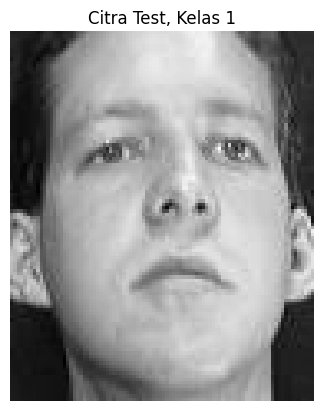

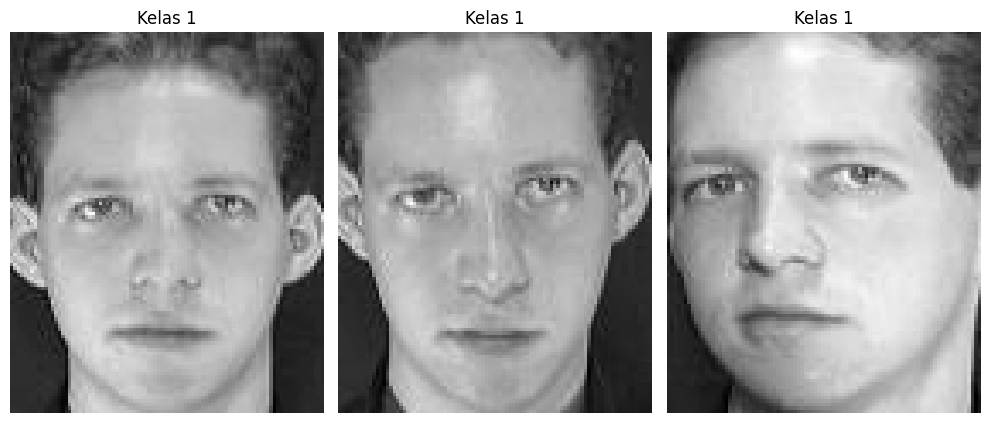

In [22]:
idx_testing = 2
citra_test = test_data[idx_testing]

# bobot citra_testing
bobot_testing = np.dot(citra_test - mean, proyeksi.T)

jarak_terdekat = float('inf')
indeks_citra_mirip = -1
prediksi_citra_match = []

for i in range(len(train_data)):
    citra_train = train_data[i]
    bobot_train = np.dot(citra_train - mean, proyeksi.T)
    jarak = np.linalg.norm(bobot_testing - bobot_train)
    if jarak < jarak_terdekat:
        jarak_terdekat = jarak
        indeks_citra_mirip = i
        prediksi_citra_match.append(citra_train)
        
print('Jarak terdekat:', jarak_terdekat)
print('Indeks citra mirip:', indeks_citra_mirip)
print('Prediksi citra match:', len(prediksi_citra_match))

# citra test
plt.imshow(citra_test.reshape(112, 92), cmap='gray')
plt.axis('off')
plt.title('Citra Test, Kelas '+str(idx_testing//4+1))
plt.show()


# prediksi citra match
fig, ax = plt.subplots(1, len(prediksi_citra_match), figsize=(10, 10))
for i in range(len(prediksi_citra_match)):
    ax[i].imshow(prediksi_citra_match[i].reshape(112, 92), cmap='gray')
    ax[i].set_title('Kelas '+str(i//6+1))
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()


## Maaf bapak untuk yang prediksi Match masih banyak yang tidak match